In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('ccdefault.csv')
data.drop('ID',axis=1,inplace=True)
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
X = data[data.columns[:-1]]
y = data['DEFAULT']
print(X.shape)
print(y.shape)

(30000, 23)
(30000,)


In [4]:
import time
start = time.process_time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,stratify=y,random_state=42)
estimator_num = [1,2,10,50,100]
scores = []
time_list= []

In [5]:
for i in estimator_num:
    forest = RandomForestClassifier(criterion='gini',n_estimators=i,random_state=1,n_jobs=2)
    forest.fit(X_train, y_train)
    cv_scores = cross_val_score(forest,X_train,y_train,cv=10)
    scores.append(np.mean(cv_scores))
    end = time.process_time()
    time_list.append(end-start)
print(scores)
print(time_list)

[0.7229618779249642, 0.7838148717319593, 0.8025179589797536, 0.8149260803739479, 0.8161110598638348]
[0.45126399999999967, 1.1385719999999995, 3.159514, 11.227191999999999, 26.776076]


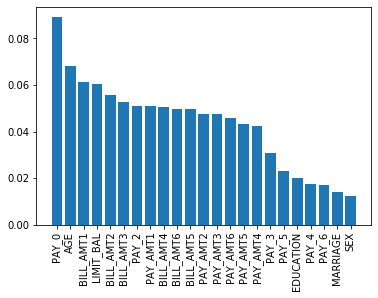

In [6]:
rf = RandomForestClassifier(n_estimators = 50)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
sorted_index = np.argsort(importances)[::-1]
x = range(len(importances))

labels = np.array(data.columns.values)[sorted_index]
plt.bar(x, importances[sorted_index], tick_label=labels)
plt.xticks(rotation=90)
plt.show()

In [7]:
print("My name is Xu Zhang")
print("My NetID is: xuz4")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xu Zhang
My NetID is: xuz4
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
